In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# d = lambda x: datetime.strptime(x, '%d-%b-%y')


coffee_dist = pd.read_csv('/Users/pabloaganza/School/berkeley/code/Project2_Team_7/psd_coffee.csv', index_col=False)
coffee_review = pd.read_csv('/Users/pabloaganza/School/berkeley/code/Project2_Team_7/coffee_reviews_supplemental.csv', index_col=False)
country_temp = pd.read_csv('/Users/pabloaganza/School/berkeley/code/Project2_Team_7/country_temp.csv', index_col=False)
coffee_country_metadata = pd.read_csv('/Users/pabloaganza/School/berkeley/code/Project2_Team_7/coffee_country_metadata.csv', index_col=False)

In [3]:
coffee_dist.columns = coffee_dist.columns.str.replace(' ', '_')


coffee_dist = coffee_dist[['Country', 'Year', 'Arabica_Production', 'Robusta_Production', 'Other_Production', 'Production', 'Total_Supply', 'Total_Distribution', 
            'Bean_Exports', 'Bean_Imports','Exports','Imports',
            'Roast_&_Ground_Exports','Roast_&_Ground_Imports', 'Soluble_Exports','Soluble_Imports', 'Domestic_Consumption']]



In [4]:
#Production
coffee_dist.groupby(['Country']).Production.sum()

Country
Albania                           0
Algeria                           0
Angola                        55827
Argentina                         0
Armenia                           0
Australia                         0
Benin                           869
Bolivia                        7362
Bosnia and Herzegovina            0
Brazil                      2221150
Burundi                       22106
Cameroon                      67286
Canada                            0
Central African Republic       8759
Chile                             0
China                         27974
Colombia                     705440
Congo (Brazzaville)             860
Congo (Kinshasa)              56963
Costa Rica                   113218
Cote d'Ivoire                201501
Croatia                           0
Cuba                          20339
Dominican Republic            38720
Ecuador                       69006
Egypt                             0
El Salvador                  121136
Equatorial Guinea   

In [11]:
coffee_country_metadata.drop(columns=['Owner', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 
                                      'Region', 'Producer','Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Owner.1', 
                                      'Variety', 'Cupper.Points','Category.One.Defects', 'Quakers', 'Category.Two.Defects', 
                                      'Expiration', 'Certification.Body','Certification.Address', 'Certification.Contact', 'unit_of_measurement', 
                                      'altitude_low_meters', 'altitude_high_meters'], inplace=True)


In [12]:
coffee_country_metadata.columns = coffee_country_metadata.columns.str.replace('.', '_')
coffee_country_metadata.columns


Index(['Unnamed: 0', 'Species', 'Country_of_Origin', 'Harvest_Year',
       'Grading_Date', 'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness',
       'Total_Cup_Points', 'Moisture', 'Color', 'altitude_mean_meters'],
      dtype='object')

In [13]:
#merged review supplemental data set with coffee distribution data set
merged_table_2 = pd.merge(coffee_dist, coffee_country_metadata, left_on='Country', right_on='Country_of_Origin')
merged_table_2


,Country,Year,Arabica_Production,Robusta_Production,Other_Production,Production,Total_Supply,Total_Distribution,Bean_Exports,Bean_Imports,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Moisture,Color,altitude_mean_meters
0,Brazil,1960,29800,0,0,29800,83320,83320,16110,0,...,8.50,8.25,8.33,10.00,10.00,10.00,88.83,0.11,Bluish-Green,NaN
1,Brazil,1960,29800,0,0,29800,83320,83320,16110,0,...,8.00,8.00,8.00,10.00,10.00,10.00,86.92,0.12,Green,"1,250.00"
2,Brazil,1960,29800,0,0,29800,83320,83320,16110,0,...,7.75,8.00,8.00,10.00,10.00,10.00,86.42,0.12,Green,"1,300.00"
3,Brazil,1960,29800,0,0,29800,83320,83320,16110,0,...,7.75,8.33,8.00,10.00,10.00,10.00,86.17,0.08,NaN,12.00
4,Brazil,1960,29800,0,0,29800,83320,83320,16110,0,...,7.75,7.92,8.00,10.00,10.00,10.00,86.17,0.01,NaN,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77499,Zambia,2019,0,0,0,0,0,0,0,0,...,7.33,7.75,7.42,10.00,10.00,10.00,81.92,0.00,NaN,"1,250.00"
77500,Zambia,2020,0,0,0,0,0,0,0,0,...,7.33,7.75,7.42,10.00,10.00,10.00,81.92,0.00,NaN,"1,250.00"
77501,Zambia,2021,0,0,0,0,0,0,0,0,...,7.33,7.75,7.42,10.00,10.00,10.00,81.92,0.00,NaN,"1,250.00"
77502,Zambia,2022,0,0,0,0,0,0,0,0,...,7.33,7.75,7.42,10.00,10.00,10.00,81.92,0.00,NaN,"1,250.00"


In [14]:
coffee_country_metadata.rename(columns={'Country_of_Origin': 'Country'}, inplace=True)
coffee_country_metadata

,Unnamed: 0,Species,Country,Harvest_Year,Grading_Date,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Moisture,Color,altitude_mean_meters
0,0,Arabica,Ethiopia,2014,"April 4th, 2015",Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
1,1,Arabica,Ethiopia,2014,"April 4th, 2015",Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,89.92,0.12,Green,"2,075.00"
2,2,Arabica,Guatemala,NaN,"May 31st, 2010",NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,89.75,0.00,NaN,"1,700.00"
3,3,Arabica,Ethiopia,2014,"March 26th, 2015",Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,89.00,0.11,Green,"2,000.00"
4,4,Arabica,Ethiopia,2014,"April 4th, 2015",Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,88.83,0.12,Green,"2,075.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,Ecuador,2016,"January 19th, 2016",NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,78.75,0.00,Blue-Green,NaN
1335,1335,Robusta,Ecuador,2016,"January 19th, 2016",NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green,40.00
1336,1336,Robusta,United States,2014,"December 23rd, 2014",Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN,795.00
1337,1337,Robusta,India,2013,"August 25th, 2014",Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green,NaN


In [15]:

mean_ranking = coffee_country_metadata.groupby('Country').Total_Cup_Points.mean().sort_values(ascending=False)
mean_ranking



Country
Papua New Guinea               85.75
Ethiopia                       85.48
Japan                          84.67
United States                  84.43
Kenya                          84.31
Panama                         83.71
Uganda                         83.45
Colombia                       83.11
El Salvador                    83.05
China                          82.93
Rwanda                         82.83
Costa Rica                     82.79
Thailand                       82.57
Indonesia                      82.57
Peru                           82.53
Brazil                         82.41
Tanzania, United Republic Of   82.37
Taiwan                         82.00
Zambia                         81.92
Guatemala                      81.85
Laos                           81.83
Burundi                        81.83
United States (Hawaii)         81.82
United States (Puerto Rico)    81.73
Malawi                         81.71
Vietnam                        81.21
India                         

In [16]:
#avg altitude per country
mean_altitude = merged_table_2.groupby('Country').altitude_mean_meters.mean().sort_values(ascending=False)

In [17]:
#avg acididty per country
mean_acidity = merged_table_2.groupby('Country').Acidity.mean().sort_values(ascending=False)

In [18]:
#avg body per country
mean_body = merged_table_2.groupby('Country').Body.mean().sort_values(ascending=False)

In [19]:
#avg balance per country
mean_balance = merged_table_2.groupby('Country').Balance.mean().sort_values(ascending=False)

In [20]:
#avg uniformity per country
mean_uniformity = merged_table_2.groupby('Country').Uniformity.mean().sort_values(ascending=False)

In [21]:
#avg Sweetness per country
mean_sweetness = merged_table_2.groupby('Country').Sweetness.mean().sort_values(ascending=False)
mean_sweetness

Country
Laos               10.00
Japan              10.00
Papua New Guinea   10.00
Panama             10.00
Malawi             10.00
Burundi            10.00
Zambia             10.00
Kenya               9.97
Mexico              9.97
Indonesia           9.97
Taiwan              9.96
Thailand            9.96
Colombia            9.95
Brazil              9.95
China               9.92
Costa Rica          9.91
Guatemala           9.87
Philippines         9.87
Peru                9.87
Ethiopia            9.86
Nicaragua           9.82
El Salvador         9.81
Honduras            9.66
Vietnam             9.58
United States       9.50
Uganda              9.36
Rwanda              9.33
Haiti               9.11
Ecuador             8.72
India               7.62
Name: Sweetness, dtype: float64

In [22]:
#avg moisture per country
mean_moisture = merged_table_2.groupby('Country').Moisture.mean().sort_values(ascending=False)
mean_moisture

Country
Malawi             0.12
Papua New Guinea   0.12
Japan              0.12
Uganda             0.11
Mexico             0.11
Rwanda             0.11
Haiti              0.11
Honduras           0.11
Nicaragua          0.11
Guatemala          0.10
Indonesia          0.10
China              0.09
Thailand           0.09
Laos               0.08
Costa Rica         0.08
Ethiopia           0.08
Brazil             0.08
Taiwan             0.08
Kenya              0.08
Philippines        0.07
Panama             0.07
Vietnam            0.07
Peru               0.07
Colombia           0.06
Burundi            0.06
El Salvador        0.05
India              0.04
Ecuador            0.03
United States      0.00
Zambia             0.00
Name: Moisture, dtype: float64

In [23]:
characteristics_merged = pd.merge(mean_sweetness, mean_moisture, on='Country')
characteristics_merged

,Sweetness,Moisture
Country,,
Laos,10.00,0.08
Japan,10.00,0.12
Papua New Guinea,10.00,0.12
Panama,10.00,0.07
Malawi,10.00,0.12
Burundi,10.00,0.06
Zambia,10.00,0.00
Kenya,9.97,0.08
Mexico,9.97,0.11


In [87]:
mean_ranking.sort_values(ascending=False)

Country
Papua New Guinea               85.75
Ethiopia                       85.48
Japan                          84.67
United States                  84.43
Kenya                          84.31
Panama                         83.71
Uganda                         83.45
Colombia                       83.11
El Salvador                    83.05
China                          82.93
Rwanda                         82.83
Costa Rica                     82.79
Thailand                       82.57
Indonesia                      82.57
Peru                           82.53
Brazil                         82.41
Tanzania, United Republic Of   82.37
Taiwan                         82.00
Zambia                         81.92
Guatemala                      81.85
Laos                           81.83
Burundi                        81.83
United States (Hawaii)         81.82
United States (Puerto Rico)    81.73
Malawi                         81.71
Vietnam                        81.21
India                         

In [25]:
characteristics_merged_complete = characteristics_merged.merge(mean_balance, on='Country').merge(mean_acidity, on='Country').merge(mean_altitude, on='Country').merge(mean_body, on='Country').merge(mean_uniformity, on='Country')
characteristics_merged_complete



,Sweetness,Moisture,Balance,Acidity,altitude_mean_meters,Body,Uniformity
Country,,,,,,,
Laos,10.00,0.08,7.42,7.31,"1,283.33",7.36,10.00
Japan,10.00,0.12,7.83,7.42,170.00,8.08,10.00
Papua New Guinea,10.00,0.12,8.25,8.33,"1,700.00",8.00,9.33
Panama,10.00,0.07,7.88,7.71,"1,515.00",7.58,10.00
Malawi,10.00,0.12,7.37,7.41,"1,403.55",7.34,10.00
Burundi,10.00,0.06,7.42,7.42,"1,790.00",7.29,10.00
Zambia,10.00,0.00,7.42,7.33,"1,250.00",7.75,10.00
Kenya,9.97,0.08,7.80,7.87,"1,502.35",7.73,9.97
Mexico,9.97,0.11,7.33,7.43,"1,235.36",7.38,9.74


In [45]:
characteristics_merged_complete_with_ranking = pd.merge(characteristics_merged_complete, mean_ranking, on='Country')
characteristics_merged_complete_with_ranking.sort_values('Total_Cup_Points', ascending=False)

,Sweetness,Moisture,Balance,Acidity,altitude_mean_meters,Body,Uniformity,Total_Cup_Points
Country,,,,,,,,
Papua New Guinea,10.00,0.12,8.25,8.33,"1,700.00",8.00,9.33,85.75
Ethiopia,9.86,0.08,7.97,8.04,"1,800.30",7.92,9.88,85.48
Japan,10.00,0.12,7.83,7.42,170.00,8.08,10.00,84.67
United States,9.50,0.00,7.82,7.93,"1,866.89",7.84,9.87,84.43
Kenya,9.97,0.08,7.80,7.87,"1,502.35",7.73,9.97,84.31
Panama,10.00,0.07,7.88,7.71,"1,515.00",7.58,10.00,83.71
Uganda,9.36,0.11,7.66,7.71,"1,590.82",7.72,10.00,83.45
Colombia,9.95,0.06,7.71,7.56,"1,585.64",7.61,9.93,83.11
El Salvador,9.81,0.05,7.71,7.59,"1,333.16",7.61,9.94,83.05


In [44]:
merged_table_2.sort_values('Total_Cup_Points', ascending=False)

,Country,Year,Arabica_Production,Robusta_Production,Other_Production,Production,Total_Supply,Total_Distribution,Bean_Exports,Bean_Imports,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Moisture,Color,altitude_mean_meters
27828,Ethiopia,1999,3505,0,0,3505,4816,4816,2005,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
27740,Ethiopia,1997,3833,0,0,3833,4493,4493,2083,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
27652,Ethiopia,1995,3800,0,0,3800,5060,5060,2500,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
26112,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
26948,Ethiopia,1979,3188,0,0,3188,3792,3792,1310,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44022,Honduras,2018,7100,0,0,7100,7437,7437,6910,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,Green,"1,400.00"
41584,Honduras,1972,759,0,0,759,857,857,686,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,Green,"1,400.00"
43068,Honduras,2000,2821,0,0,2821,2908,2908,2470,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,Green,"1,400.00"
41531,Honduras,1971,586,0,0,586,751,751,560,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,Green,"1,400.00"


Text(0.5, 1.0, 'Mean Altitudes of Countries')

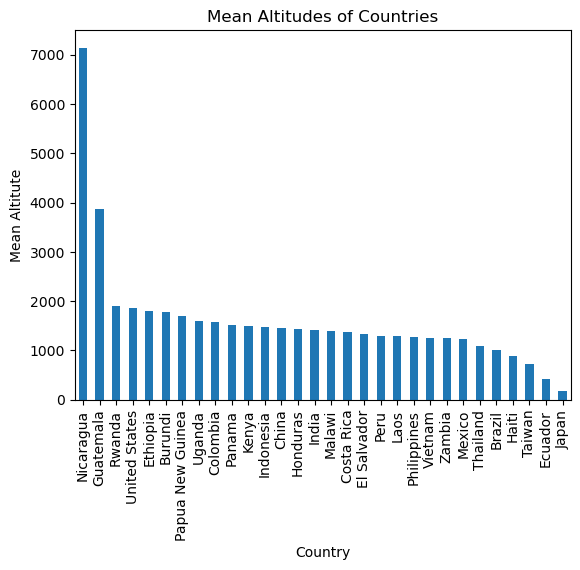

In [91]:
merged_table_2.groupby("Country").altitude_mean_meters.mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Mean Altitute')
plt.title('Mean Altitudes of Countries')

In [129]:
top_5_altitude_countries = merged_table_2[
    (merged_table_2['Country'] == 'Nicaragua') |
    (merged_table_2['Country'] == 'Guatemala') |
    (merged_table_2['Country'] == 'Rwanda') |
    (merged_table_2['Country'] == 'United States') |
    (merged_table_2['Country'] == 'Ethiopia')]

Text(0, 0.5, 'Acidity')

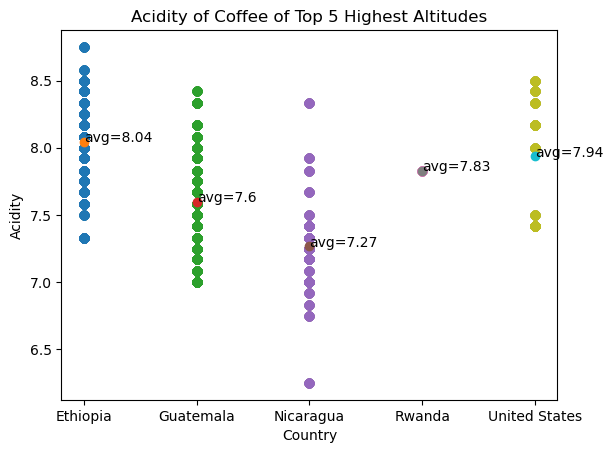

In [128]:
variable = 'Acidity'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{variable} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(variable)

Text(0, 0.5, 'Balance')

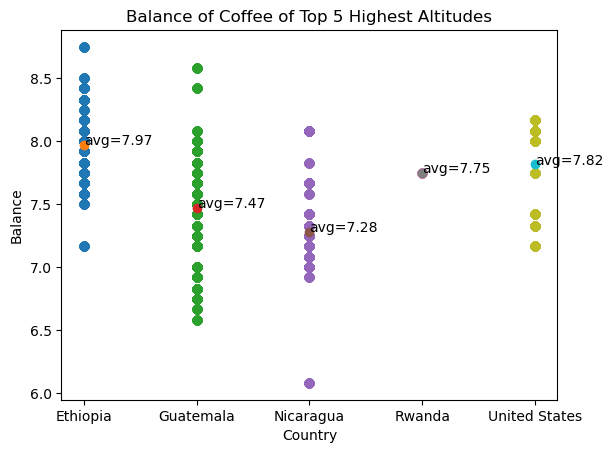

In [117]:
variable = 'Balance'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{variable} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(variable)

Text(0, 0.5, 'Moisture')

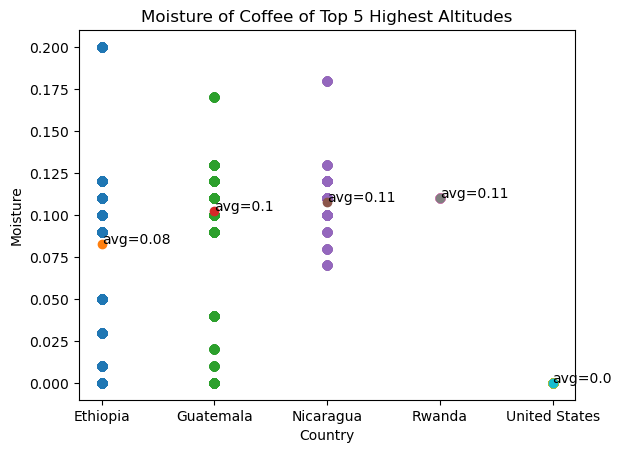

In [118]:
variable = 'Moisture'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{variable} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(variable)

Text(0, 0.5, 'Sweetness')

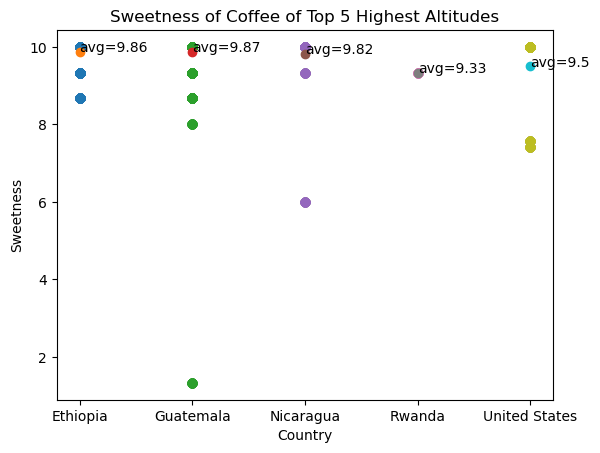

In [119]:
variable = 'Sweetness'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{variable} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(variable)

Text(0, 0.5, 'Uniformity')

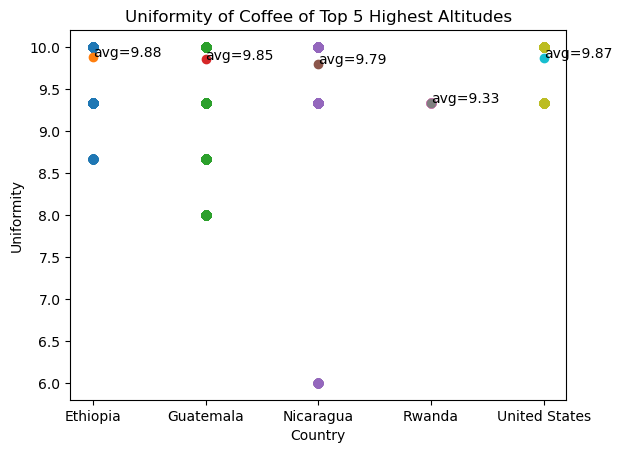

In [120]:
variable = 'Uniformity'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{variable} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(variable)

Text(0, 0.5, 'Ranking')

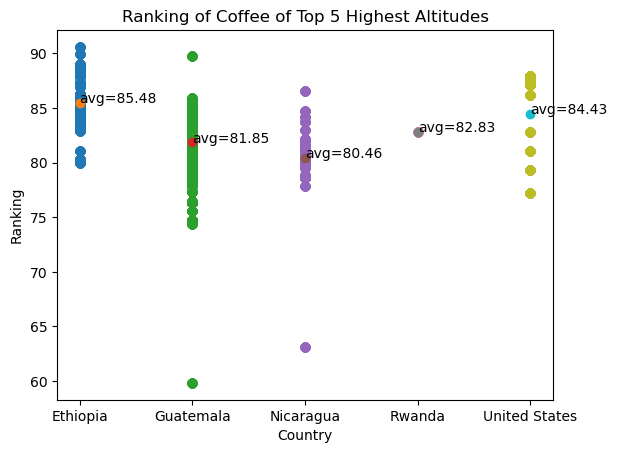

In [122]:
variable = 'Total_Cup_Points'
name = 'Ranking'
for country, df in top_5_altitude_countries.groupby('Country'):
    plt.scatter(df['Country'], df[variable])
    plt.scatter(country, df[variable].mean())
    plt.annotate('avg='+str(round(df[variable].mean(), 2)), (country, df[variable].mean()))
plt.title(f'{name} of Coffee of Top 5 Highest Altitudes')
plt.xlabel('Country')
plt.ylabel(name)

Text(0.5, 1.0, 'Mean Ranking of All Countries')

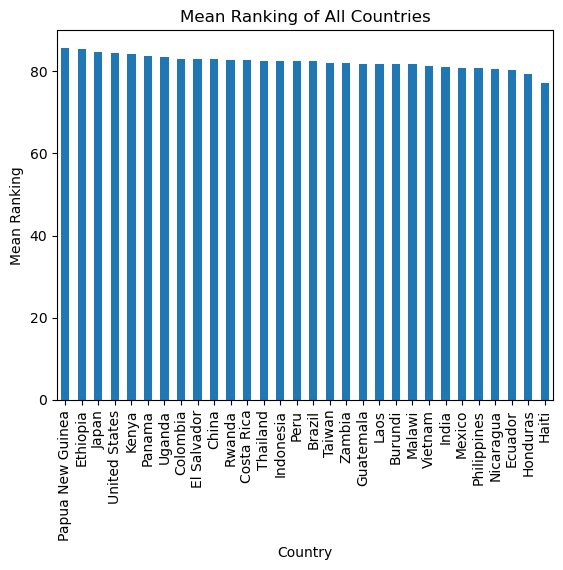

In [130]:
merged_table_2.groupby("Country").Total_Cup_Points.mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Mean Ranking')
plt.title('Mean Ranking of All Countries')

In [134]:
top_5_ranked_countries = merged_table_2[
    (merged_table_2['Country'] == 'Papua New Guinea') |
    (merged_table_2['Country'] == 'Ethiopia') |
    (merged_table_2['Country'] == 'Japan') |
    (merged_table_2['Country'] == 'United States') |
    (merged_table_2['Country'] == 'Kenya')]
top_5_ranked_countries

,Country,Year,Arabica_Production,Robusta_Production,Other_Production,Production,Total_Supply,Total_Distribution,Bean_Exports,Bean_Imports,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Moisture,Color,altitude_mean_meters
26112,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,"2,075.00"
26113,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.58,8.42,8.42,10.00,10.00,10.00,89.92,0.12,Green,"2,075.00"
26114,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.42,8.50,8.25,10.00,10.00,10.00,89.00,0.11,Green,"2,000.00"
26115,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.50,8.42,8.33,10.00,10.00,10.00,88.83,0.12,Green,"2,075.00"
26116,Ethiopia,1960,1687,0,0,1687,1883,1883,921,0,...,8.42,8.33,8.50,10.00,10.00,9.33,88.67,0.03,NaN,"1,635.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,United States,2023,50,0,0,50,31175,31175,0,24000,...,8.00,8.17,8.08,10.00,10.00,10.00,86.17,0.00,NaN,"1,941.00"
76924,United States,2023,50,0,0,50,31175,31175,0,24000,...,7.50,7.75,7.75,10.00,10.00,10.00,82.83,0.00,NaN,"1,200.00"
76925,United States,2023,50,0,0,50,31175,31175,0,24000,...,7.42,7.25,7.33,10.00,10.00,10.00,81.08,0.00,NaN,"1,706.88"
76926,United States,2023,50,0,0,50,31175,31175,0,24000,...,7.42,7.42,7.42,9.33,10.00,7.58,79.33,0.00,Green,"3,000.00"


Text(0.5, 1.0, 'Mean Altitute of Top Ranked Countries')

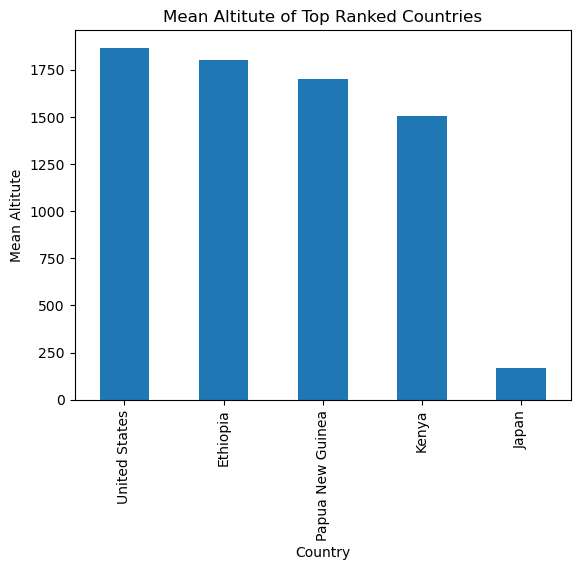

In [137]:
top_5_ranked_countries.groupby("Country").altitude_mean_meters.mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Mean Altitute')
plt.title('Mean Altitute of Top Ranked Countries')